<h2 style="color:darkblue;">1.Project Setup</h2>

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the CSV
file_path = r"C:\Users\venka\Downloads\population.csv"
df = pd.read_csv(file_path)

# Step 2: Print the actual column names (for verification)
print("🔍 Actual column names in the CSV:")

print(df.columns.tolist())
df.head()

🔍 Actual column names in the CSV:
['Rank', 'State', 'Capital', 'Population', '% of Total Population', 'Males', 'Females', 'Sex Ratio', 'Literacy Rate (%)', 'Rural Population', 'Urban Population', 'Area (km*km)', 'Density (1/km*km)', 'Decadal Growth (%)']


,Rank,State,Capital,Population,% of Total Population,Males,Females,Sex Ratio,Literacy Rate (%),Rural Population,Urban Population,Area (km*km),Density (1/km*km),Decadal Growth (%)
0,1,Uttar Pradesh,Lucknow,"199,812,341",16.50,"104,480,510","95,331,831",912,67.68,"155,111,022","44,470,455","240,928",828,20.1%
1,2,Maharashtra,Mumbai,"112,374,333",9.28,"58,243,056","54,131,277",929,82.34,"61,545,441","50,827,531","307,713",365,16.0%
2,3,Bihar,Patna,"104,099,452",8.60,"54,278,157","49,821,295",918,61.80,"92,075,028","11,729,609","94,163","1,102",25.1%
3,4,West Bengal,Kolkata,"91,276,115",7.54,"46,809,027","44,467,088",950,76.26,"62,213,676","29,134,060","88,752","1,030",13.9%
4,5,Andhra Pradesh,Hyderabad,"84,580,777",6.99,"42,442,146","42,138,631",993,67.02,"56,361,702","28,219,075","275,045",308,10.98%


<h2>2.Data preprocessing</h>

In [15]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove commas and percentage signs from values
df = df.replace({',': '', '%': ''}, regex=True)

# Now use corrected names
numeric_cols = [
    'Population',
    'Males',
    'Females',
    'Sex Ratio',
    'Literacy Rate (%)',
    'Rural Population',
    'Urban Population',
    'Area (km*km)',
    'Density (1/km*km)',
    'Decadal Growth (%)'
]

# Convert to numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing data (optional)
df.dropna(subset=numeric_cols, inplace=True)

# Show numeric summary
df[numeric_cols].describe()


,Population,Males,Females,Sex Ratio,Literacy Rate (%),Rural Population,Urban Population,Area (km*km),Density (1/km*km),Decadal Growth (%)
count,3.400000e+01,3.400000e+01,3.400000e+01,34.000000,34.000000,3.400000e+01,3.400000e+01,34.000000,34.000000,34.000000
mean,3.555125e+07,1.829404e+07,1.724982e+07,931.235294,77.892941,2.447783e+07,1.096968e+07,96195.941176,1120.500000,19.602353
std,4.475454e+07,2.321390e+07,2.155501e+07,81.084714,8.723519,3.322583e+07,1.368951e+07,104425.000611,2415.227064,10.640253
min,6.447300e+04,3.312300e+04,3.135000e+04,618.000000,61.800000,1.412100e+04,5.030800e+04,32.000000,17.000000,4.900000
25%,1.402432e+06,7.202190e+05,6.822125e+05,899.250000,70.757500,6.497422e+05,7.220610e+05,8808.250000,189.000000,13.925000
50%,2.106970e+07,1.086011e+07,9.828672e+06,947.000000,77.145000,1.283316e+07,5.162647e+06,54578.000000,357.500000,18.950000
75%,6.093140e+07,3.136011e+07,2.983359e+07,975.250000,86.000000,3.662973e+07,1.679362e+07,150578.000000,795.500000,22.525000
max,1.998123e+08,1.044805e+08,9.533183e+07,1084.000000,94.000000,1.551110e+08,5.082753e+07,342239.000000,11297.000000,55.500000


<h2 color="red">3. Exploratory Data Analysis (EDA)</h2>

In [16]:
# Top 5 most populous states
df.sort_values(by="Population", ascending=False).head()


,Rank,State,Capital,Population,% of Total Population,Males,Females,Sex Ratio,Literacy Rate (%),Rural Population,Urban Population,Area (km*km),Density (1/km*km),Decadal Growth (%)
0,1,Uttar Pradesh,Lucknow,199812341,16.50,104480510,95331831,912,67.68,155111022,44470455,240928,828,20.10
1,2,Maharashtra,Mumbai,112374333,9.28,58243056,54131277,929,82.34,61545441,50827531,307713,365,16.00
2,3,Bihar,Patna,104099452,8.60,54278157,49821295,918,61.80,92075028,11729609,94163,1102,25.10
3,4,West Bengal,Kolkata,91276115,7.54,46809027,44467088,950,76.26,62213676,29134060,88752,1030,13.90
4,5,Andhra Pradesh,Hyderabad,84580777,6.99,42442146,42138631,993,67.02,56361702,28219075,275045,308,10.98


In [17]:
# Literacy rate stats
df['Literacy Rate (%)'].describe()


count    34.000000
mean     77.892941
std       8.723519
min      61.800000
25%      70.757500
50%      77.145000
75%      86.000000
max      94.000000
Name: Literacy Rate (%), dtype: float64

In [18]:
df.sort_values(by='Sex Ratio', ascending=False)[['State', 'Sex Ratio']].head(5)

,State,Sex Ratio
11,Kerala,1084
27,Puducherry,1037
6,Tamil Nadu,996
4,Andhra Pradesh,993
23,Manipur,992


In [19]:
df.sort_values(by='Sex Ratio')[['State', 'Sex Ratio']].head(5)


,State,Sex Ratio
33,Daman and Diu,618
32,Dadra and Nagar Haveli,774
29,Chandigarh,818
17,Delhi,868
31,Andaman and Nicobar Islands,876


<h2>4.Visualizations</h2>

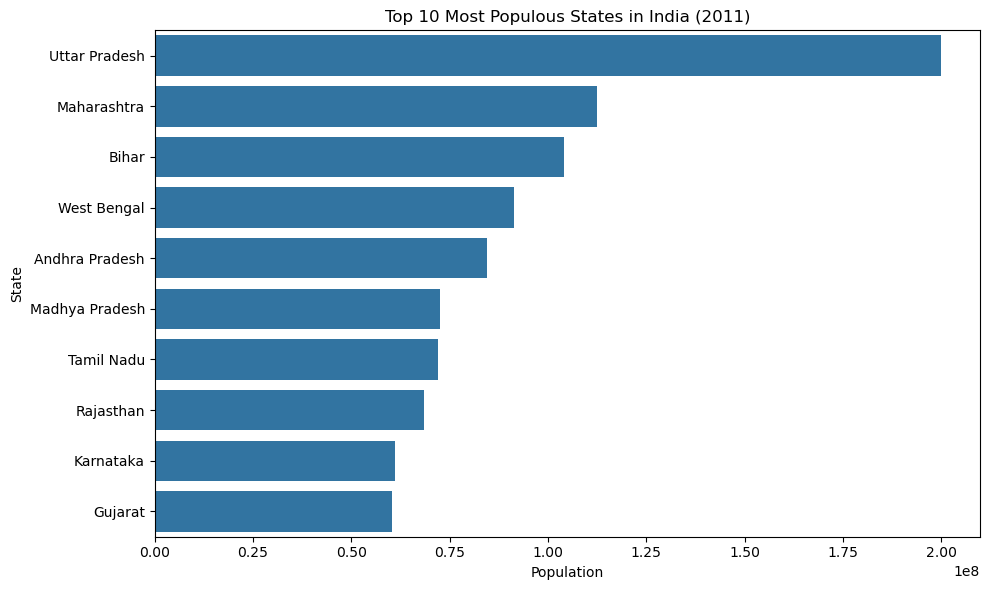

In [20]:
plt.figure(figsize=(10,6))
top10 = df.sort_values(by='Population', ascending=False).head(10)
sns.barplot(x='Population', y='State', data=top10)
plt.title("Top 10 Most Populous States in India (2011)")
plt.xlabel("Population")
plt.ylabel("State")
plt.tight_layout()
plt.show()

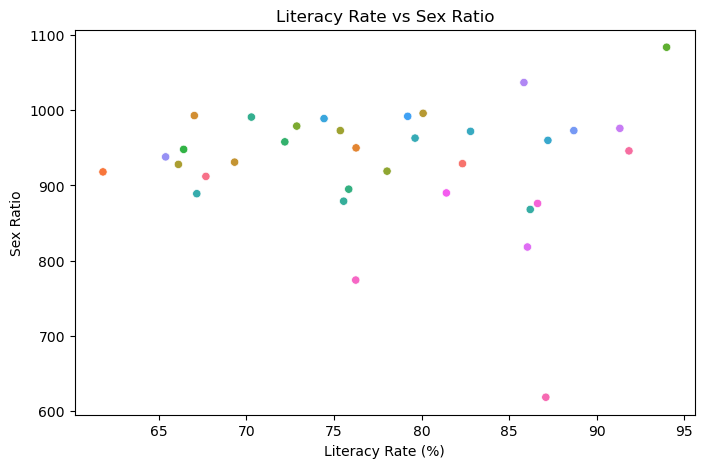

In [21]:
# Literacy Rate vs Sex Ratio
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Literacy Rate (%)", y="Sex Ratio", hue="State", legend=False)
plt.title("Literacy Rate vs Sex Ratio")
plt.show()

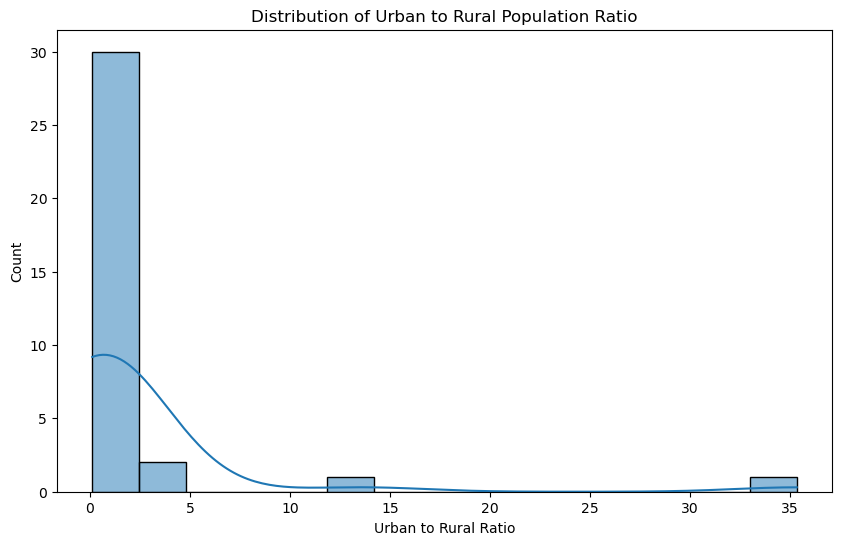

In [22]:
# Urban vs Rural Population
df['Urban to Rural Ratio'] = df['Urban Population'] / df['Rural Population']
plt.figure(figsize=(10,6))
sns.histplot(df['Urban to Rural Ratio'], bins=15, kde=True)
plt.title("Distribution of Urban to Rural Population Ratio")
plt.show()

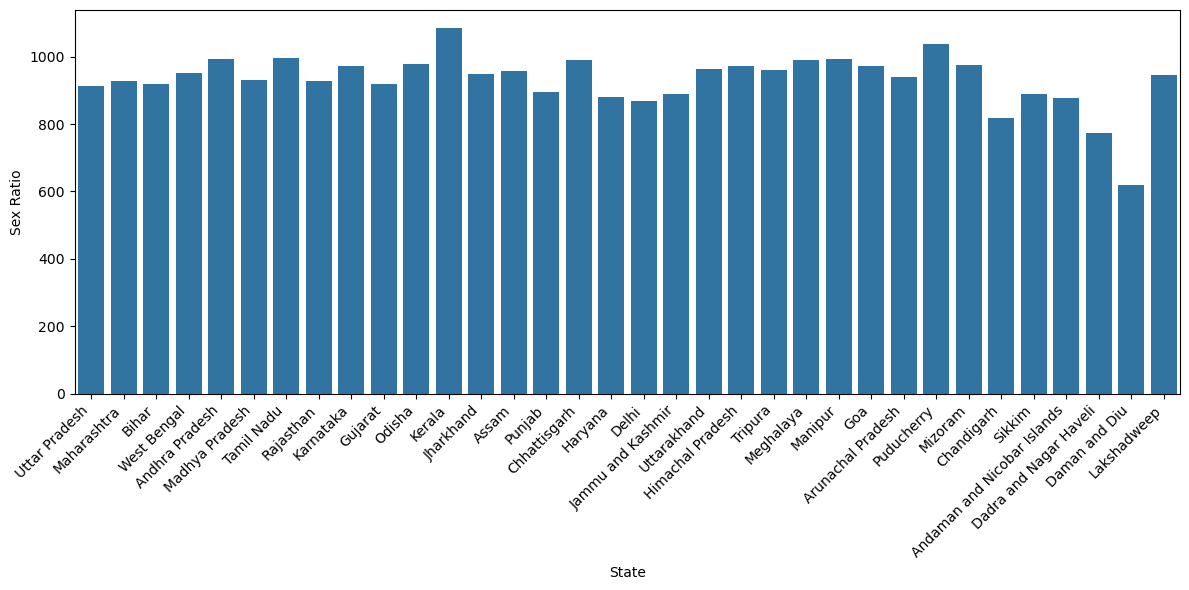

In [37]:

plt.figure(figsize=(12, 6))  # Adjust width if needed
sns.barplot(x='State', y='Sex Ratio', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate labels and align right
plt.tight_layout()
plt.show()

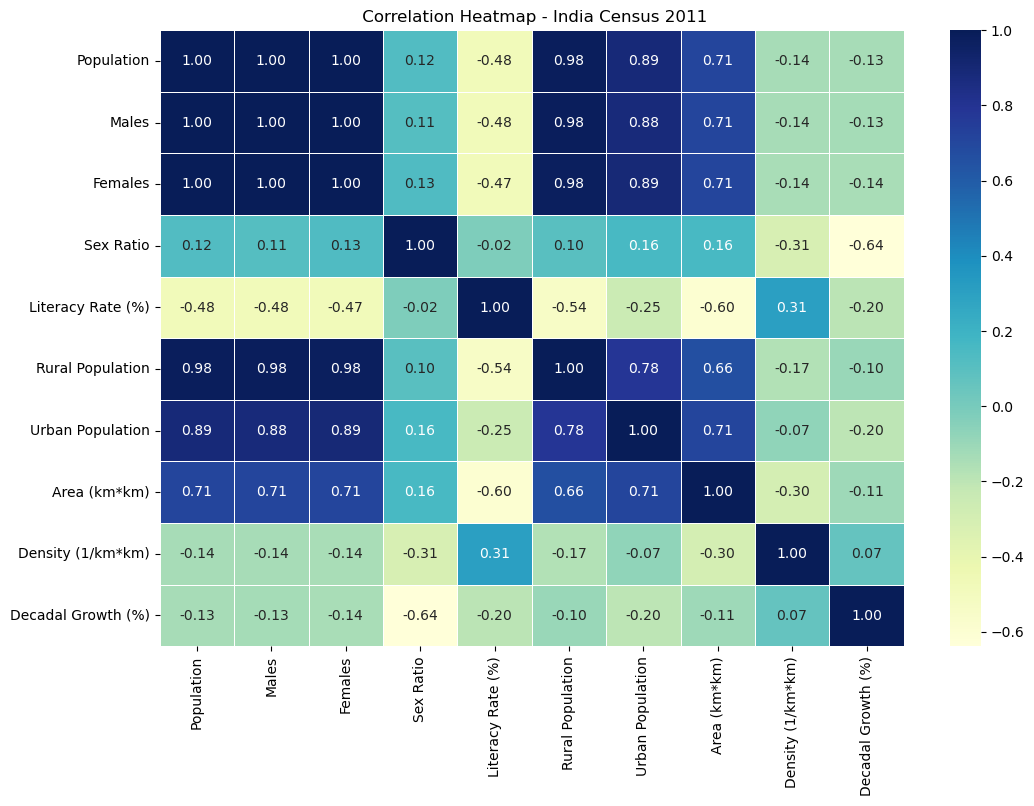

In [35]:
# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title(' Correlation Heatmap - India Census 2011')
plt.show()


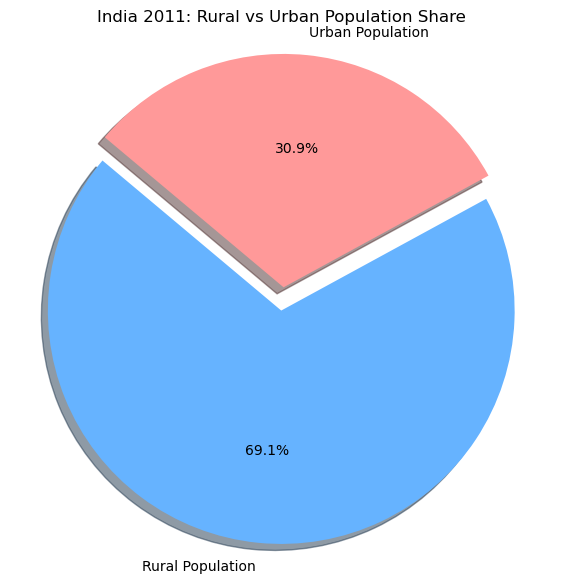

In [26]:
# Sum total urban and rural population
total_urban = df['Urban Population'].sum()
total_rural = df['Rural Population'].sum()

# Labels and values
labels = ['Rural Population', 'Urban Population']
sizes = [total_rural, total_urban]
colors = ['#66b3ff', '#ff9999']

# Plot
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, explode=(0.05, 0.05), shadow=True)
plt.title('India 2011: Rural vs Urban Population Share')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()

<h2>5.Insights</h2>

## 📌 Insights
- Uttar Pradesh is the most populous state.
- Kerala shows a high literacy rate along with a favorable sex ratio.
- States with high population density are generally urbanized (e.g., Delhi).
- The urban-to-rural ratio highlights migration trends toward urban areas.


<h2>6.Filtering</h2>

In [53]:
# States with literacy > 85%
high_lit = df[df['Literacy Rate (%)'] > 85]
high_lit[['State', 'Literacy Rate (%)']]



,State,Literacy Rate (%)
11,Kerala,94.00
17,Delhi,86.21
21,Tripura,87.22
25,Goa,88.70
27,Puducherry,85.85
28,Mizoram,91.33
29,Chandigarh,86.05
31,Andaman and Nicobar Islands,86.63
33,Daman and Diu,87.10
34,Lakshadweep,91.85


In [54]:
# States with density > 1000
high_density = df[df['Density (1/km*km)'] > 1000]
high_density[['State', 'Density (1/km*km)']]


,State,Density (1/km*km)
2,Bihar,1102
3,West Bengal,1030
17,Delhi,11297
27,Puducherry,2598
29,Chandigarh,9252
33,Daman and Diu,2169
34,Lakshadweep,2013
